In [7]:
import numpy as np
import tensorflow as tf

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

from tensorflow import keras
from tensorflow.keras import layers

import matplotlib.pyplot as plt

In [8]:
# Simple linear regression
# X = np.random.randint(1,40,20).reshape((-1,1))
# y = np.random.randint(5,30,20)

# multi-linear regression
# X = np.random.rand(10,2)*100
# y = np.random.randint(1,100,10)

# Polynomial regression
X = np.random.randint(1,40,10).reshape((-1,1))
y = np.random.randint(5,30,10)

In [18]:
X_ = PolynomialFeatures(degree=2, include_bias=True).fit_transform(X)


In [22]:
model = LinearRegression(fit_intercept=False, n_jobs=-1).fit(X_,y)
R_2 = model.score(X_,y)
print(f'R square: {R_2}\nb0: {model.intercept_}\nb1: {model.coef_}')

R square: 0.01973379049213564
b0: 0.0
b1: [ 1.18711318e+01  3.10865839e-01 -7.21712778e-03]


In [23]:
X_, X_.shape

(array([[1.000e+00, 1.000e+01, 1.000e+02],
        [1.000e+00, 2.500e+01, 6.250e+02],
        [1.000e+00, 1.100e+01, 1.210e+02],
        [1.000e+00, 3.400e+01, 1.156e+03],
        [1.000e+00, 2.000e+00, 4.000e+00],
        [1.000e+00, 9.000e+00, 8.100e+01],
        [1.000e+00, 3.500e+01, 1.225e+03],
        [1.000e+00, 1.400e+01, 1.960e+02],
        [1.000e+00, 2.800e+01, 7.840e+02],
        [1.000e+00, 1.500e+01, 2.250e+02]]),
 (10, 3))

In [21]:
model.coef_

array([ 0.        ,  0.31086584, -0.00721713])

In [45]:
X = X.flatten()
fig = plt.figure(figsize=(10,5))
plt.plot(X, y, 'o')
plt.plot(X_pred, y_pred, 'o', color='green')
plt.plot(X, model.coef_ * X + model.intercept_);

ValueError: x and y must have same first dimension, but have shapes (1,) and (10,)

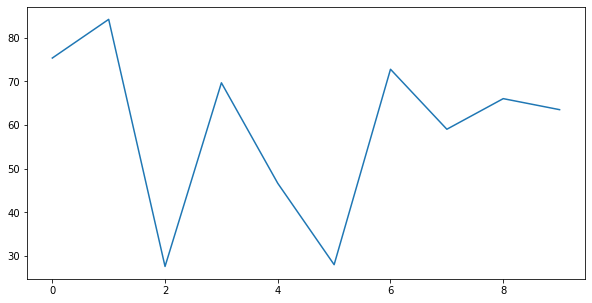

In [58]:
fig = plt.figure(figsize=(10,5))
plt.plot(np.arange(10), model.intercept_ + np.sum(model.coef_ * X, axis=1));

In [25]:
# X_pred = np.arange(10).reshape((-1,1))
# y_pred = model.predict(X_pred)
# y_pred

# X_pred = np.random.rand(5,2)*100
# y_pred = model.predict(X_pred)
# X_pred

# Poly
y_pred = model.predict(X_)
y_pred

array([14.25807738, 15.13207288, 14.41738353, 14.09757057, 12.46399494,
       14.08433697, 13.91045459, 14.80869647, 14.91714707, 14.9102656 ])

In [61]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()



In [62]:
type(X_train[0][0])

numpy.ndarray

In [63]:
# X_train = X_train.astype("float32") / 255
# X_test = X_test.astype("float32") / 255

X_train = X_train / 255
X_test = X_test  / 255

In [64]:
model = keras.Sequential(
    [
        keras.Input(shape=(28,28), dtype='float32', name='inputs'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.1),
        layers.Dense(10)
    ]
)
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 64)                50240     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [65]:
model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=[keras.metrics.SparseCategoricalAccuracy()])

In [66]:
%%time

history = model.fit(X_train,
                    y_train,
                    epochs=10,
                    batch_size=64,
                    validation_split=0.2,
                    verbose=2)


Epoch 1/10
750/750 - 2s - loss: 0.3982 - sparse_categorical_accuracy: 0.8859 - val_loss: 0.2179 - val_sparse_categorical_accuracy: 0.9369
Epoch 2/10
750/750 - 1s - loss: 0.2101 - sparse_categorical_accuracy: 0.9377 - val_loss: 0.1602 - val_sparse_categorical_accuracy: 0.9538
Epoch 3/10
750/750 - 1s - loss: 0.1669 - sparse_categorical_accuracy: 0.9504 - val_loss: 0.1378 - val_sparse_categorical_accuracy: 0.9605
Epoch 4/10
750/750 - 1s - loss: 0.1403 - sparse_categorical_accuracy: 0.9588 - val_loss: 0.1271 - val_sparse_categorical_accuracy: 0.9637
Epoch 5/10
750/750 - 1s - loss: 0.1250 - sparse_categorical_accuracy: 0.9628 - val_loss: 0.1219 - val_sparse_categorical_accuracy: 0.9653
Epoch 6/10
750/750 - 1s - loss: 0.1144 - sparse_categorical_accuracy: 0.9666 - val_loss: 0.1183 - val_sparse_categorical_accuracy: 0.9655
Epoch 7/10
750/750 - 1s - loss: 0.1043 - sparse_categorical_accuracy: 0.9694 - val_loss: 0.1122 - val_sparse_categorical_accuracy: 0.9689
Epoch 8/10
750/750 - 1s - loss: 0.

In [67]:
test_predict = model.evaluate(X_test,
                              y_test,
                              verbose=2)

313/313 - 0s - loss: 0.1057 - sparse_categorical_accuracy: 0.9708


In [68]:
import tensorflow_hub as hub
module_url = "https://tfhub.dev/tensorflow/bert_en_uncased_L-24_H-1024_A-16/1"
bert_layer = hub.KerasLayer(module_url, trainable=True)

In [ ]:
bert_layer.resolved_object.vo
